In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# ランダムに２次元データを作成する
data_num = 200
data_2d = []
for i in range(data_num):
    data_2d.append(np.random.random_sample(2))
# L2正規化する
from sklearn.preprocessing import normalize
datas_2d_normalization = normalize(data_2d,norm='l2')

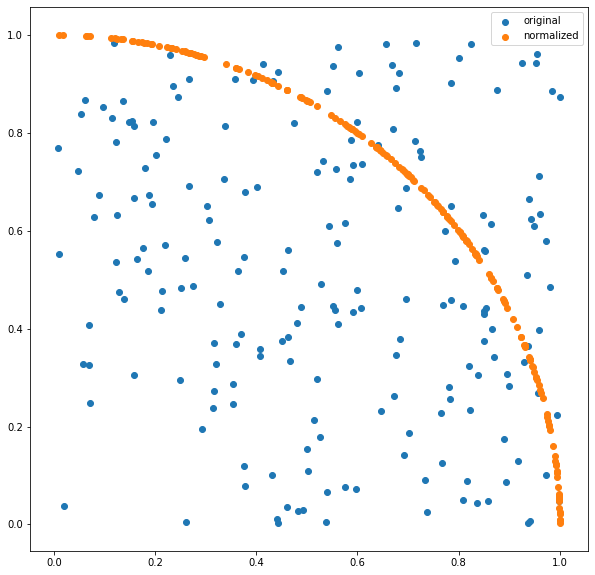

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(np.array(data_2d)[:,0],np.array(data_2d)[:,1],label='original')
plt.scatter(datas_2d_normalization[:,0],datas_2d_normalization[:,1],label='normalized')
plt.legend()
plt.show()

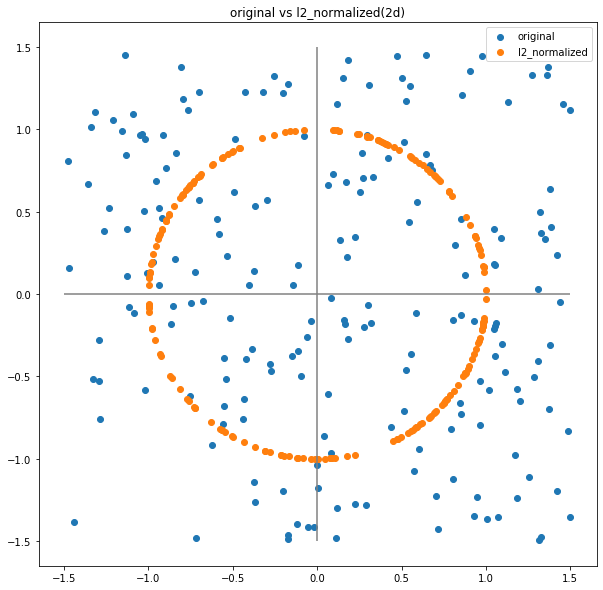

In [68]:
# -1.5 ~ 1.5
datas_2d_mod = (data_2d - np.ones(2)*0.5)*3
# -1 ~ 1
datas_2d_mod_normalization = normalize(datas_2d_mod,norm='l2')
# 可視化
plt.figure(figsize=(10,10))
plt.scatter(np.array(datas_2d_mod)[:,0],np.array(datas_2d_mod)[:,1],label='original')
plt.scatter(datas_2d_mod_normalization[:,0],datas_2d_mod_normalization[:,1],label='l2_normalized')
plt.vlines(0,ymin=-1.5,ymax=1.5,colors='gray')
plt.hlines(0,xmin=-1.5,xmax=1.5,colors='gray')
plt.title('original vs l2_normalized(2d)')
plt.legend()
plt.show()

In [51]:
# ランダムに２次元データを作成する
data_num = 1500
data_3d = []
for i in range(data_num):
    data_3d.append(np.random.random_sample(3))
# L2正規化する
from sklearn.preprocessing import normalize
datas_3d_normalization = normalize(data_3d,norm='l2')

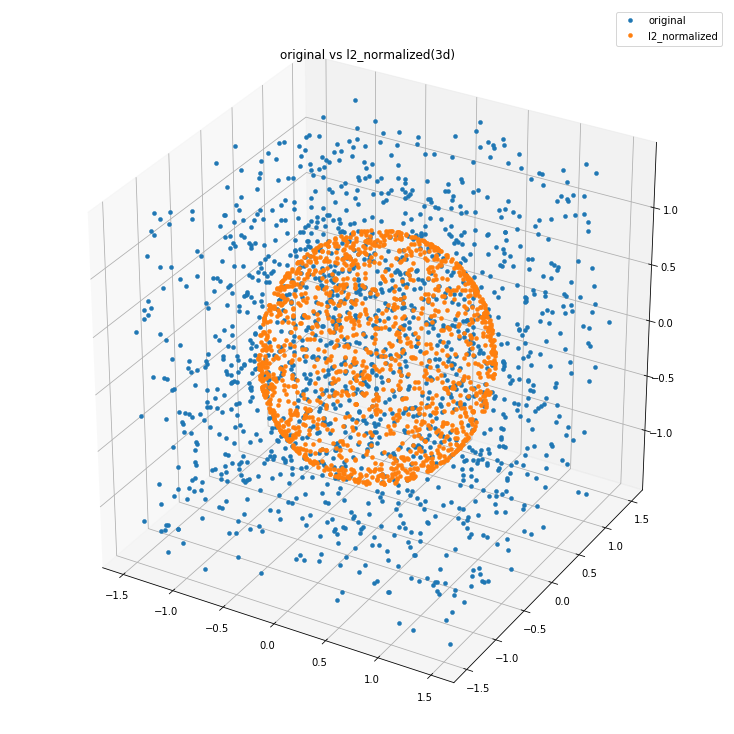

In [69]:
from mpl_toolkits.mplot3d import Axes3D
# -1.5 ~ 1.5
datas_3d_mod = (data_3d - np.ones(3)*0.5)*3
# -1 ~ 1
datas_3d_mod_normalization = normalize(datas_3d_mod,norm='l2')
# 可視化
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.plot(datas_3d_mod[:,0], datas_3d_mod[:,1], datas_3d_mod[:,2], "o", ms=4, mew=0.5,label='original')
ax.plot(datas_3d_mod_normalization[:,0], datas_3d_mod_normalization[:,1], datas_3d_mod_normalization[:,2], "o", ms=4, mew=0.5,label='l2_normalized')
#ax.hlines(0,xmin=-1.5,xmax=1.5)
# 表示
plt.title('original vs l2_normalized(3d)')
plt.legend()
plt.show()

#plt.figure(figsize=(10,10))
#plt.scatter(np.array(datas_3d_mod)[:,0],np.array(datas_3d_mod)[:,1],label='original')
#plt.scatter(datas_3d_mod_normalization[:,0],datas_3d_mod_normalization[:,1],label='normalized')
#plt.vlines(0,ymin=-1.5,ymax=1.5,colors='gray')
#plt.hlines(0,xmin=-1.5,xmax=1.5,colors='gray')
#plt.title('original vs l2_normalized')
#plt.legend()
#plt.show()

In [82]:
# 定義に従って計算
x = np.array([1,2,3,4,5])
x_l2_norm = sum(x**2)**0.5
x_l2_normalized = x / x_l2_norm
# 検算
np.linalg.norm(x_l2_normalized,ord=2)

1.0

In [157]:
# numpy.linalg.normを使う
x = np.array([1,2,3,4,5])
x_l2_norm = np.linalg.norm(x,ord=2)
x_l2_normalized = x / x_l2_norm
# 検算
np.linalg.norm(x_l2_normalized,ord=2)

1.0

In [158]:
x_l2_norm

7.416198487095663

In [115]:
# sklearn.preprocessing.normalizeを使う
from sklearn.preprocessing import normalize
x = [[1,2,3,4,5],]
x_l2_normalized = normalize(x,norm='l2')
x_2d = [[1,2,3,4,5],[6,7,8,9,10]]
x_2d_l2_normalized = normalize(x_2d,norm='l2')
x_2d_l2_normalized2 = normalize(x_2d,norm='l2',axis=0)
# 検算
print(np.linalg.norm(x_l2_normalized,ord=2))
print(np.linalg.norm(x_2d_l2_normalized[0,:],ord=2))
print(np.linalg.norm(x_2d_l2_normalized[1,:],ord=2))
print(np.linalg.norm(x_2d_l2_normalized2[:,0],ord=2))
print(np.linalg.norm(x_2d_l2_normalized2[:,1],ord=2))
print(np.linalg.norm(x_2d_l2_normalized2[:,2],ord=2))
print(np.linalg.norm(x_2d_l2_normalized2[:,3],ord=2))
print(np.linalg.norm(x_2d_l2_normalized2[:,4],ord=2))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999


IndexError: index 5 is out of bounds for axis 1 with size 5

In [155]:
# keras.backend.l2_normalizeを使う
from keras import backend as K
x = [1.,2.,3.,4.,5.]
x_2d = [[1.,2.,3.,4.,5.],[6.,7.,8.,9.,10.]]
x_l2_normalized = K.l2_normalize(x,axis=0)
x_2d_l2_normalized = K.l2_normalize(x_2d,axis=0)
x_2d_l2_normalized2 = K.l2_normalize(x_2d,axis=1)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_l2_normalized = sess.run(x_l2_normalized)
    x_2d_l2_normalized = sess.run(x_2d_l2_normalized)
    x_2d_l2_normalized2 = sess.run(x_2d_l2_normalized2)
# 検算
print(np.linalg.norm(x_l2_normalized,ord=2))
print(np.linalg.norm(x_2d_l2_normalized[:,0],ord=2))
print(np.linalg.norm(x_2d_l2_normalized[:,1],ord=2))
print(np.linalg.norm(x_2d_l2_normalized[:,2],ord=2))
print(np.linalg.norm(x_2d_l2_normalized[:,3],ord=2))
print(np.linalg.norm(x_2d_l2_normalized[:,4],ord=2))
print(np.linalg.norm(x_2d_l2_normalized2[0,:],ord=2))
print(np.linalg.norm(x_2d_l2_normalized2[1,:],ord=2))

1.0000001
1.0
0.99999994
1.0
0.99999994
1.0
1.0000001
1.0


In [95]:
import tensorflow as tf
# tf.math.l2_normalizeを使う
tf.__version__

'1.14.0'

In [156]:
import tensorflow as tf

x = tf.Variable([1,2,3,4,5], dtype=tf.float32)
x_2d = tf.Variable([[1,2,3,4,5],[6,7,8,9,10]], dtype=tf.float32)
x_l2_normalized = tf.math.l2_normalize(x,axis=0)
x_2d_l2_normalized = tf.math.l2_normalize(x_2d,axis=0)
x_2d_l2_normalized2 = tf.math.l2_normalize(x_2d,axis=1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_l2_normalized = sess.run(x_l2_normalized)
    x_2d_l2_normalized = sess.run(x_2d_l2_normalized)
    x_2d_l2_normalized2 = sess.run(x_2d_l2_normalized2)
# 検算
print(np.linalg.norm(x_l2_normalized,ord=2))
print(np.linalg.norm(x_2d_l2_normalized[:,0],ord=2))
print(np.linalg.norm(x_2d_l2_normalized[:,1],ord=2))
print(np.linalg.norm(x_2d_l2_normalized[:,2],ord=2))
print(np.linalg.norm(x_2d_l2_normalized[:,3],ord=2))
print(np.linalg.norm(x_2d_l2_normalized[:,4],ord=2))
print(np.linalg.norm(x_2d_l2_normalized2[0,:],ord=2))
print(np.linalg.norm(x_2d_l2_normalized2[1,:],ord=2))

1.0000001
1.0
0.99999994
1.0
0.99999994
1.0
1.0000001
1.0


In [148]:
a = np.array([[1,2,3],[4,5,6]])
a.shape

(2, 3)